TRAIN-TEST SPLIT IN BALANCED DATASET

In [1]:
#Importing Pandas
import pandas as pd

#Load Data
df = pd.read_csv('combined_dataset.csv')    

#View Data
df.tail()

,Score,Summary
49995,5,Good Source Of Energy
49996,4,Very tasty!
49997,1,Stale Popcorn
49998,5,Fantastic Wholesome Treat
49999,5,what a way to start your day!


In [2]:
score_counts = df['Score'].value_counts().sort_index()

print(score_counts)


Score
1     5719
2     4155
3     5081
4     7646
5    27399
Name: count, dtype: int64


Text Normalization Code (Clean & Commented)

In [3]:
import re
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources (only first time)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and normalize text
def clean_text(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove URLs and HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)   # URLs
    text = re.sub(r'<.*?>', '', text)                    # HTML
    
    # 3. Remove emojis and non-alphabetic characters
    text = re.sub(r'[^\w\s]', '', text)                  # punctuation
    text = re.sub(r'[\d_]', '', text)                    # numbers and underscores
    text = re.sub(r'\s+', ' ', text).strip()             # extra spaces
    
    # 4. Tokenize
    tokens = nltk.word_tokenize(text)
    
    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # 6. Lemmatize (convert words to base form)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 7. Rejoin tokens
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply cleaning to your dataset
df['cleaned_summary'] = df['Summary'].astype(str).apply(clean_text)

# 8. Filter out reviews with <3 words or extremely long text (>150 words)
df = df[df['cleaned_summary'].apply(lambda x: len(x.split()) >= 3)]
df = df[df['cleaned_summary'].apply(lambda x: len(x.split()) <= 150)]

print("⭐Remaining samples after cleaning:", len(df))
df[['Summary', 'cleaned_summary', 'Score']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


⭐Remaining samples after cleaning: 25343


,Summary,cleaned_summary,Score
0,Sweet & Low without the cancer.,sweet low without cancer,1
1,Do not buy this particular tea...,buy particular tea,1
7,Please bring back old formula....,please bring back old formula,1
9,Something seriously wrong here:,something seriously wrong,1
10,"I love coconut water, but this is not good at ...",love coconut water good,1


count how many reviews of each score exist

In [4]:
# Count how many reviews per score (1–5)
score_counts = df['Score'].value_counts().sort_index()

print(score_counts)

Score
1     2767
2     2005
3     2681
4     4235
5    13655
Name: count, dtype: int64


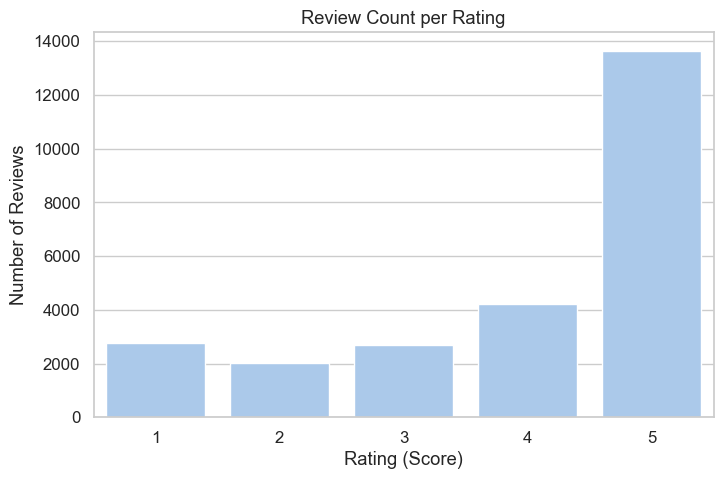

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a clean visual style
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.1)




plt.figure(figsize=(8,5))
sns.countplot(x='Score', data=df, order=sorted(df['Score'].unique()))
plt.title("Review Count per Rating")
plt.xlabel("Rating (Score)")
plt.ylabel("Number of Reviews")
plt.show()

balanced dataset with exactly 2,000 samples per class

In [5]:
# Number of samples per class
n_samples = 2000

# Create balanced dataset
balanced_df = (
    df.groupby('Score', group_keys=False)
      .apply(lambda x: x.sample(n=n_samples, random_state=42))
      .reset_index(drop=True)
)



# Optional: verify counts
print(balanced_df['Score'].value_counts().sort_index())

Score
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64


C:\Users\91940\AppData\Local\Temp\ipykernel_21120\3267084933.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=n_samples, random_state=42))


Bar Plot — Review Count per Rating

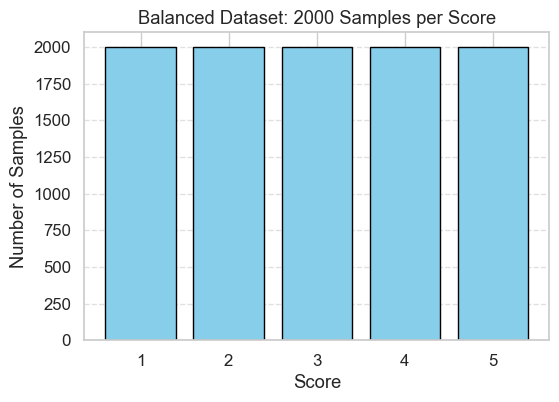

In [7]:
import pandas as pd
import matplotlib.pyplot as plt



# Count per score
counts = balanced_df['Score'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Number of Samples')
plt.title('Balanced Dataset: 2000 Samples per Score')
plt.xticks([1,2,3,4,5])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Plot Histogram (Matplotlib)

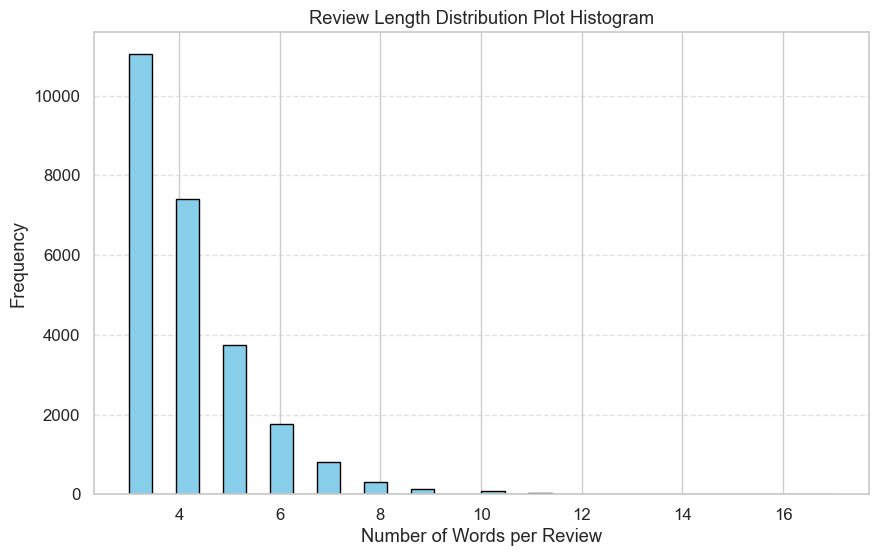

In [8]:
import matplotlib.pyplot as plt
import pandas as pd



# Add a column for word count (review length)
df['review_length'] = df['cleaned_summary'].apply(lambda x: len(str(x).split()))


plt.figure(figsize=(10,6))
plt.hist(df['review_length'], bins=30, color='skyblue', edgecolor='black')
plt.title("Review Length Distribution Plot Histogram")
plt.xlabel("Number of Words per Review")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Histogram by Rating (Seaborn)

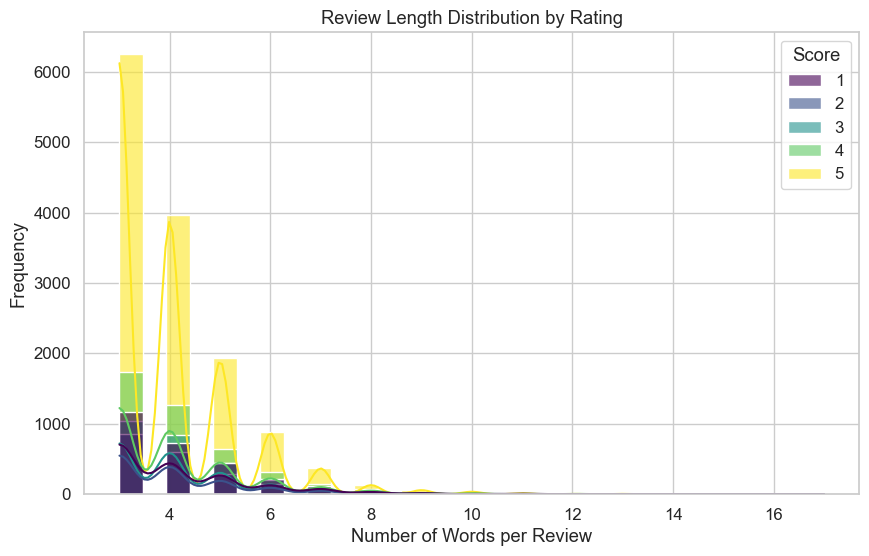

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='review_length',
    hue='Score',
    bins=30,
    kde=True,
    palette='viridis',
    alpha=0.6
)
plt.title("Review Length Distribution by Rating")
plt.xlabel("Number of Words per Review")
plt.ylabel("Frequency")
plt.show()


box-plot

C:\Users\91940\AppData\Local\Temp\ipykernel_15544\1371601519.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score', y='review_length', data=df, palette='viridis')


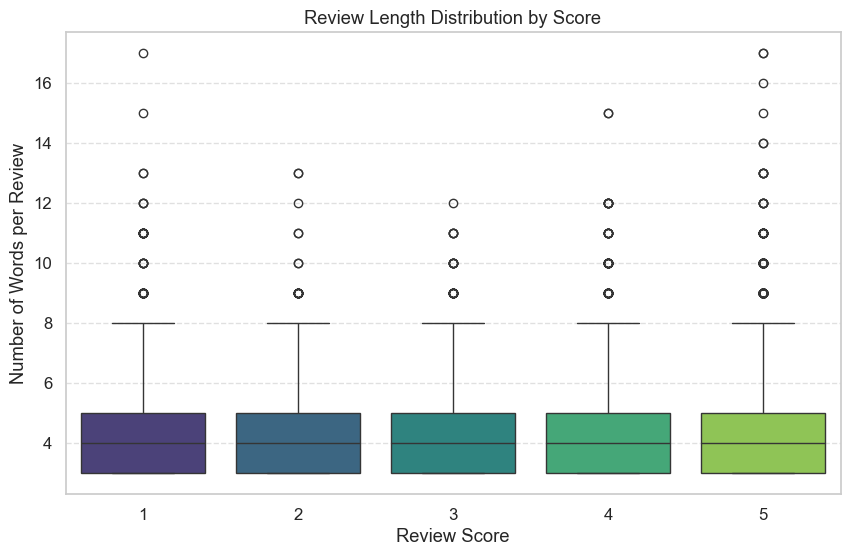

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Add review length column (if not already)
df['review_length'] = df['cleaned_summary'].apply(lambda x: len(str(x).split()))

# Boxplot: Review length distribution by Score
plt.figure(figsize=(10,6))
sns.boxplot(x='Score', y='review_length', data=df, palette='viridis')
plt.title("Review Length Distribution by Score")
plt.xlabel("Review Score")
plt.ylabel("Number of Words per Review")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Top Words Visualization

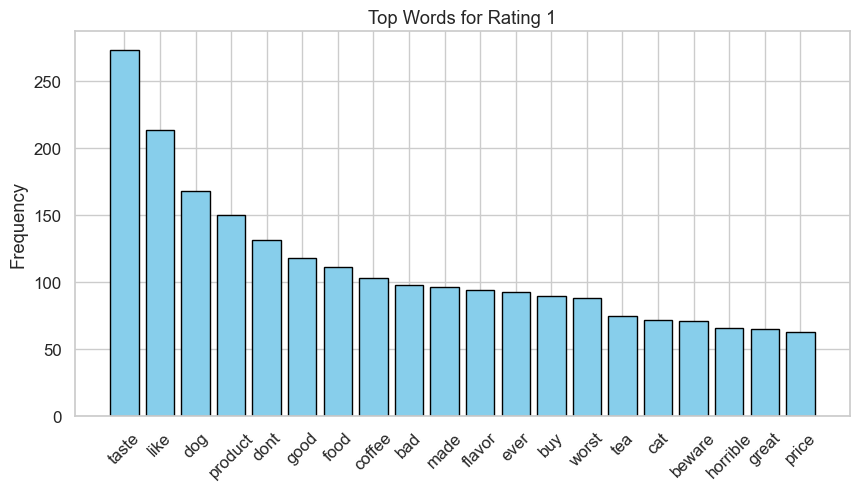

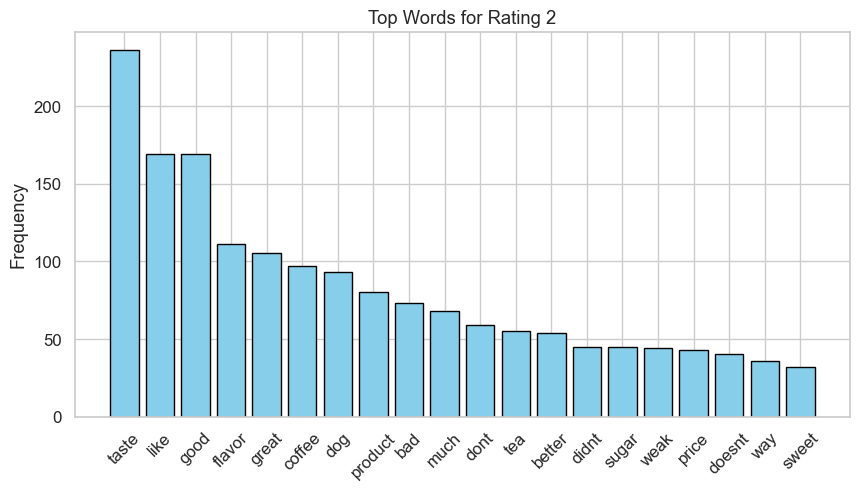

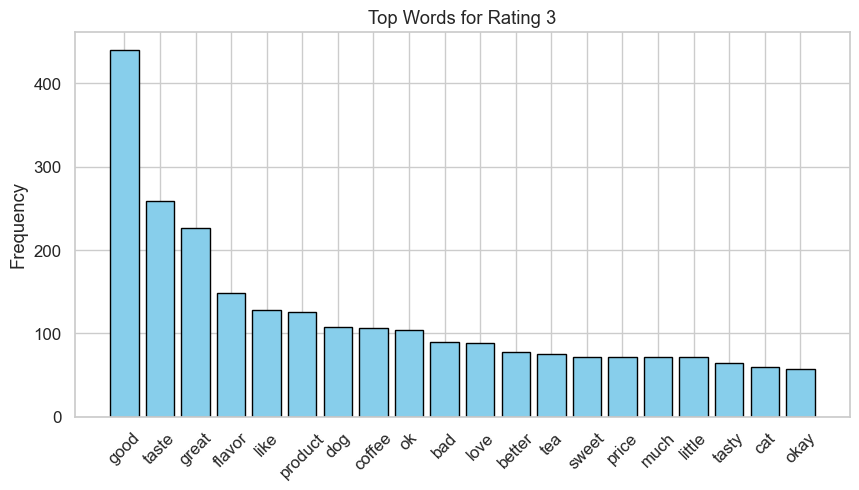

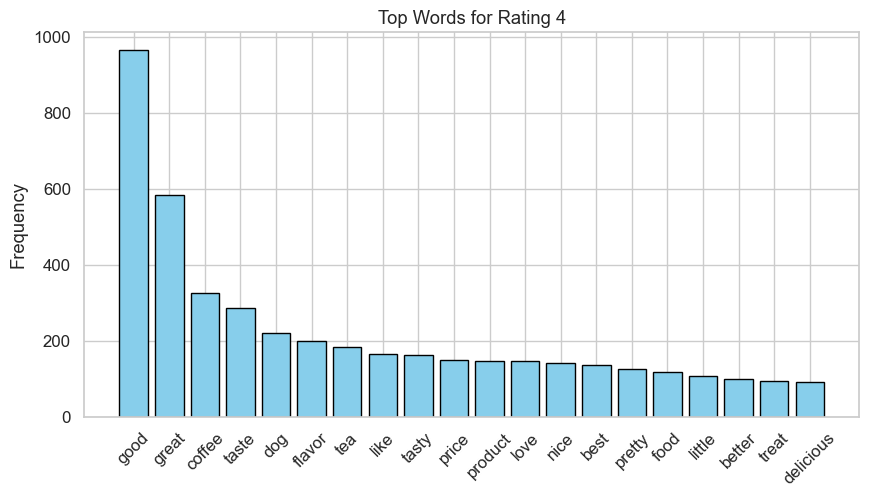

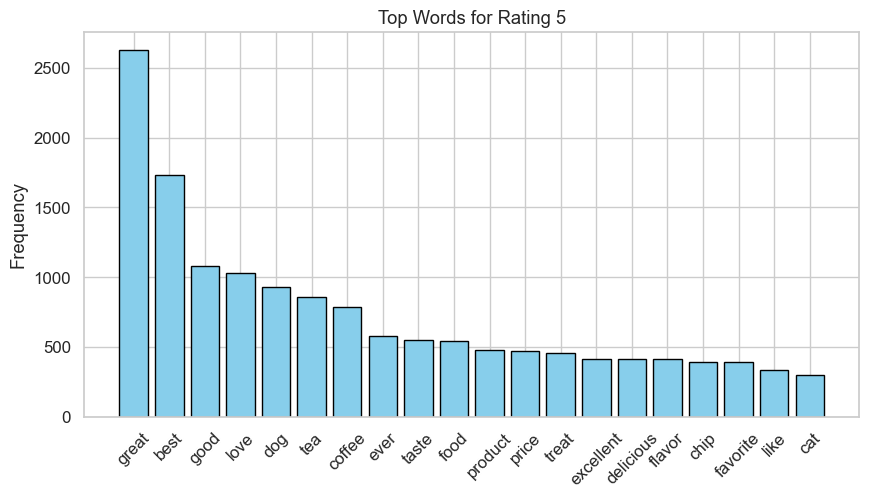

In [11]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


# Function to get top N words for a text series
def get_top_words(text_series, n=20):
    words = ' '.join(text_series).split()
    counter = Counter(words)
    return counter.most_common(n)

# Plot top words for each score
scores = sorted(df['Score'].unique())

for score in scores:
    top_words = get_top_words(df[df['Score']==score]['cleaned_summary'])
    words, counts = zip(*top_words)
    
    plt.figure(figsize=(10,5))
    plt.bar(words, counts, color='skyblue', edgecolor='black')
    plt.title(f"Top Words for Rating {score}")
    plt.xticks(rotation=45)
    plt.ylabel("Frequency")
    plt.show()


Display 3–10 Sample Reviews per Rating

In [6]:
# Display random sample reviews for each rating
for rating in sorted(df['Score'].unique()):
    print(f"\n{'='*40}")
    print(f"⭐ Rating: {rating}")
    print(f"{'='*40}")
    
    samples = df[df['Score'] == rating].sample(n=min(5, len(df[df['Score'] == rating])), random_state=42)
    for i, review in enumerate(samples['cleaned_summary'], 1):
        print(f"{i}. {review}\n")
        




⭐ Rating: 1
1. twice price store

2. varied like shown

3. warning individually wrapped

4. mediocre taste gritty texture

5. new delivery stale nasty taste


⭐ Rating: 2
1. good flavor dry bean

2. cute mostly waste money

3. health benefit grape black currant

4. good dieter bad tastebud

5. good idea dog enjoyed broke immediately


⭐ Rating: 3
1. good taste bit dry

2. sticky messy delight

3. bought local supermarket

4. fun gift dented

5. health benefit good would buy


⭐ Rating: 4
1. good tasten tea

2. poor packaging result loss transit

3. good alternative regular orange soda

4. good value money

5. good lime taste


⭐ Rating: 5
1. time favorite tea bag

2. dog love pill pocket

3. happy remember descale unit

4. sweet kitty favorite

5. best organic formula



Train–Test Split + TF-IDF Vectorization

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have your balanced & cleaned dataset:
# balanced_df with columns ['cleaned_summary', 'Score']

# -----------------------------
# 1️⃣ Shuffle and Split (Stratified)
# -----------------------------
X = balanced_df['cleaned_summary']
y = balanced_df['Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y,   # ensures class balance in both sets
    shuffle=True
)

print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("\nTrain class distribution:\n", y_train.value_counts())
print("\nTest class distribution:\n", y_test.value_counts())

# -----------------------------
# 2️⃣ Apply Preprocessing Separately
# -----------------------------
# Assuming you already defined `clean_text()` from Section 2
X_train_clean = X_train.apply(clean_text)
X_test_clean  = X_test.apply(clean_text)

# -----------------------------
# 3️⃣ Vectorize Text (TF-IDF)
# -----------------------------
tfidf = TfidfVectorizer(
    max_features=5000,       # limit vocabulary size
    stop_words='english',    # remove common stopwords
    ngram_range=(1, 2)       # unigrams + bigrams
)

# Fit on training data ONLY, transform both
X_train_tfidf = tfidf.fit_transform(X_train_clean)
X_test_tfidf  = tfidf.transform(X_test_clean)

print("\nTF-IDF matrix shape:")
print("Train:", X_train_tfidf.shape)
print("Test:", X_test_tfidf.shape)


Train set size: 8000
Test set size: 2000

Train class distribution:
 Score
1    1600
4    1600
3    1600
2    1600
5    1600
Name: count, dtype: int64

Test class distribution:
 Score
1    400
2    400
3    400
5    400
4    400
Name: count, dtype: int64

TF-IDF matrix shape:
Train: (8000, 5000)
Test: (2000, 5000)


 training code for Logistic Regression, Random Forest, and Linear SVM

In [9]:
# -----------------------------
# 4️⃣ Train Multiple Models
# -----------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight='balanced'  # handles any remaining imbalance
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=20,
        class_weight='balanced'
    ),
    'Linear SVM': LinearSVC(
        max_iter=2000,
        random_state=42,
        class_weight='balanced'
    )
}

# -----------------------------
# 5️⃣ Train and Evaluate Each Model
# -----------------------------
results = {}

for model_name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training {model_name}...")
    print(f"{'='*60}")
    
    # Train
    model.fit(X_train_tfidf, y_train)
    
    # Predict
    y_pred = model.predict(X_test_tfidf)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n✅ {model_name} - Accuracy: {accuracy:.4f}")
    print(f"\n📊 Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n🔢 Confusion Matrix:")
    print(cm)
    
    # Store results
    results[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred,
        'confusion_matrix': cm
    }

# -----------------------------
# 6️⃣ Compare Models
# -----------------------------
print(f"\n{'='*60}")
print("📈 MODEL COMPARISON")
print(f"{'='*60}")

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()]
}).sort_values('Accuracy', ascending=False)

print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\n Model A: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")






Training Logistic Regression...

✅ Logistic Regression - Accuracy: 0.4325

📊 Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.56      0.54       400
           2       0.36      0.36      0.36       400
           3       0.36      0.34      0.35       400
           4       0.39      0.38      0.38       400
           5       0.51      0.52      0.52       400

    accuracy                           0.43      2000
   macro avg       0.43      0.43      0.43      2000
weighted avg       0.43      0.43      0.43      2000


🔢 Confusion Matrix:
[[222  87  39  25  27]
 [ 89 145 105  37  24]
 [ 51  85 138  78  48]
 [ 29  47  74 151  99]
 [ 36  34  24  97 209]]

Training Random Forest...

✅ Random Forest - Accuracy: 0.4210

📊 Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.46      0.50       400
           2       0.31      0.53      0.39       400
           3       0.

save the best model

In [17]:
# -----------------------------
# 8️⃣ Save the Best Model and Vectorizer
# -----------------------------
import joblib
import pickle

# Save the best model
model_filename = f'best_model_{best_model_name.replace(" ", "_").lower()}.pkl'
joblib.dump(best_model, model_filename)
print(f"✅ Best model saved as: {model_filename}")

# Save the TF-IDF vectorizer (IMPORTANT!)
vectorizer_filename = 'tfidf_vectorizer.pkl'
joblib.dump(tfidf, vectorizer_filename)
print(f"✅ Vectorizer saved as: {vectorizer_filename}")

# Optional: Save all models
print("\n📦 Saving all models...")
for model_name, model_data in results.items():
    filename = f'model_{model_name.replace(" ", "_").lower()}.pkl'
    joblib.dump(model_data['model'], filename)
    print(f"   - {model_name} saved as: {filename}")

# -----------------------------
# 9️⃣ Save Model Metadata
# -----------------------------
metadata = {
    'best_model_name': best_model_name,
    'best_accuracy': results[best_model_name]['accuracy'],
    'all_accuracies': {name: results[name]['accuracy'] for name in results.keys()},
    'train_size': len(X_train),
    'test_size': len(X_test),
    'feature_count': X_train_tfidf.shape[1],
    'classes': sorted(y.unique().tolist())
}

metadata_filename = 'model_metadata.pkl'
joblib.dump(metadata, metadata_filename)
print(f"\n✅ Metadata saved as: {metadata_filename}")

print("\n" + "="*60)
print("💾 ALL FILES SAVED SUCCESSFULLY!")
print("="*60)
print(f"\nTo load and use the model later:")
print(f"""
# Load model and vectorizer
model = joblib.load('{model_filename}')
vectorizer = joblib.load('{vectorizer_filename}')

# Predict on new text
def predict_new_review(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    return prediction

# Example
review = "Great product, highly recommend!"
score = predict_new_review(review)
print(f"Predicted Score: {{score}}")
""")

✅ Best model saved as: best_model_linear_svm.pkl
✅ Vectorizer saved as: tfidf_vectorizer.pkl

📦 Saving all models...
   - Logistic Regression saved as: model_logistic_regression.pkl
   - Random Forest saved as: model_random_forest.pkl
   - Linear SVM saved as: model_linear_svm.pkl

✅ Metadata saved as: model_metadata.pkl

💾 ALL FILES SAVED SUCCESSFULLY!

To load and use the model later:

# Load model and vectorizer
model = joblib.load('best_model_linear_svm.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Predict on new text
def predict_new_review(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    return prediction

# Example
review = "Great product, highly recommend!"
score = predict_new_review(review)
print(f"Predicted Score: {score}")



test of model B

In [23]:
import joblib
# ============================================
# STEP 2: LOAD SAVED MODEL AND VECTORIZER
# ============================================
print("\n" + "="*60)
print("📥 LOADING SAVED MODEL AND VECTORIZER")
print("="*60)

try:
    # Load the vectorizer (MUST use the same one from training)
    vectorizer = joblib.load('../../Models/Model_B_vectorizer.pkl')
    print("✅ Vectorizer loaded successfully")
    
    
    # Load the best model directly
    model_filename = '../../Models/Model_B_random_forest.pkl'
    model = joblib.load(model_filename)
    best_model_name = 'Random Forest'
    print(f"✅ Best model loaded: {best_model_name}")
    print(f"   Model file: {model_filename}")
    
except FileNotFoundError as e:
    print(f"❌ Error: Could not find saved model files.")
    print(f"   Make sure you have the following files:")
    print(f"   - Model_B_random_forest.pkl")
    print(f"   - tfidf_vectorizer.pkl")
    print(f"   Missing file: {e.filename}")
    exit()

# ============================================
# STEP 3: PREPARE TEST DATA
# ============================================
print("\n" + "="*60)
print("🔄 PREPARING TEST DATA")
print("="*60)

X_test = balanced_df['cleaned_summary']
y_test = balanced_df['Score']

# Transform using the SAME vectorizer from training
X_test_tfidf = vectorizer.transform(X_test)

print(f"✅ Test data prepared")
print(f"   Shape: {X_test_tfidf.shape}")
print(f"   Samples: {len(y_test)}")

# ============================================
# STEP 4: MAKE PREDICTIONS
# ============================================
print("\n" + "="*60)
print("🔮 MAKING PREDICTIONS")
print("="*60)

y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Predictions complete!")
print(f"\n🎯 TEST ACCURACY MODEL B: {accuracy:.4f} ({accuracy*100:.2f}%)")

# ============================================
# STEP 5: DETAILED EVALUATION
# ============================================
print("\n" + "="*60)
print("📊 DETAILED EVALUATION RESULTS")
print("="*60)

# Classification Report
print("\n📈 Classification Report:")
print(classification_report(
    y_test, 
    y_pred, 
    target_names=[f"Score {i}" for i in range(1, 6)],
    digits=4
))

# Confusion Matrix
print("\n🔢 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, 
    index=[f"True {i}" for i in range(1, 6)],
    columns=[f"Pred {i}" for i in range(1, 6)]
)
print(cm_df)

# Per-class accuracy
print("\n📊 Per-Class Accuracy:")
for i in range(1, 6):
    class_mask = (y_test == i)
    class_accuracy = accuracy_score(y_test[class_mask], y_pred[class_mask])
    print(f"   Score {i}: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

# ============================================
# STEP 6: PREDICTION EXAMPLES
# ============================================
print("\n" + "="*60)
print("💡 SAMPLE PREDICTIONS")
print("="*60)




# Save evaluation metrics
test_results = {
    'model_name': best_model_name,
    'test_accuracy-model_B': float(accuracy),
    'test_samples': int(len(y_test)),
    'class_distribution': y_test.value_counts().to_dict(),
    'per_class_accuracy': {}
}

for i in range(1, 6):
    class_mask = (y_test == i)
    class_acc = accuracy_score(y_test[class_mask], y_pred[class_mask])
    test_results['per_class_accuracy'][f'score_{i}'] = float(class_acc)


print("\n" + "="*60)
print("✨ TESTING COMPLETE!")
print("="*60)
print(f"\nFinal Test Accuracy Model B: {accuracy:.4f} ({accuracy*100:.2f}%)")



📥 LOADING SAVED MODEL AND VECTORIZER
✅ Vectorizer loaded successfully
✅ Best model loaded: Random Forest
   Model file: ../../Models/Model_B_random_forest.pkl

🔄 PREPARING TEST DATA
✅ Test data prepared
   Shape: (10000, 5000)
   Samples: 10000

🔮 MAKING PREDICTIONS
✅ Predictions complete!

🎯 TEST ACCURACY MODEL B: 0.4596 (45.96%)

📊 DETAILED EVALUATION RESULTS

📈 Classification Report:
              precision    recall  f1-score   support

     Score 1     0.6466    0.4235    0.5118      2000
     Score 2     0.5178    0.3275    0.4012      2000
     Score 3     0.3918    0.4935    0.4368      2000
     Score 4     0.3705    0.5665    0.4480      2000
     Score 5     0.5271    0.4870    0.5062      2000

    accuracy                         0.4596     10000
   macro avg     0.4907    0.4596    0.4608     10000
weighted avg     0.4907    0.4596    0.4608     10000


🔢 Confusion Matrix:
        Pred 1  Pred 2  Pred 3  Pred 4  Pred 5
True 1     847     273     419     308     153
True 